In [3]:
import os
import sys
from moviepy.editor import VideoFileClip
import librosa 
import moviepy.editor as mp
import IPython.display as ipd 
import matplotlib.pyplot as plt 
import numpy as np
from moviepy.editor import *
import os
from natsort import natsorted
import matplotlib.pyplot as plt 

In [29]:
import moviepy.editor as mp
clip = mp.VideoFileClip("C:/Users/HP/Desktop/powerplay.mp4") # input video
clip.audio.write_audiofile("theaudio.wav")

MoviePy - Writing audio in theaudio.wav


MoviePy - Done.


In [30]:
filename='theaudio.wav'
x, sr = librosa.load(filename,sr=16000)
    

In [31]:
int(librosa.get_duration(x, sr)/60)

23

In [21]:
#breaking the audio chunks into 5 sec audio to test whether there is an excitement level
max_slice=5 
window_length = max_slice * sr

In [22]:
a=x[21*window_length:22*window_length] 
ipd.Audio(a, rate=sr)

In [23]:
energy = sum(abs(a**2))
print(energy)

16112.579124406759


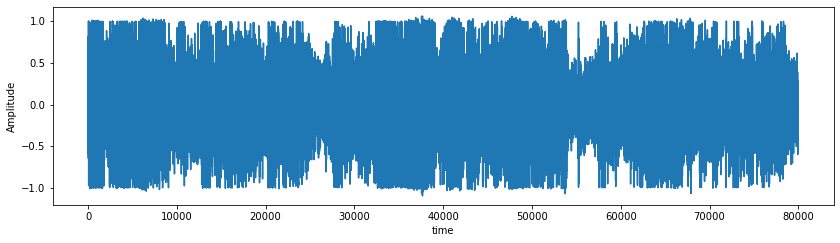

In [9]:
fig = plt.figure(figsize=(14, 8)) 
ax1 = fig.add_subplot(211) 
ax1.set_xlabel('time') 
ax1.set_ylabel('Amplitude') 
ax1.plot(a)

In [25]:
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])


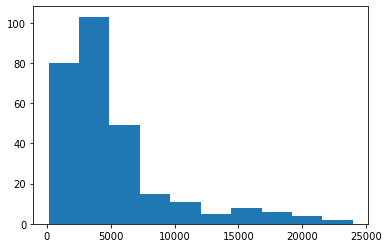

In [11]:
import matplotlib.pyplot as plt 
plt.hist(energy) 
plt.show()
#choose the extreme values as threshold as we only want excited audio

In [18]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])
thresh=12000  # i took it beacuse the excitement level goes high till this threshold
row_index=0
for i in range(len(energy)):
  value=energy[i]
  if(value>=thresh):
    i=np.where(energy == value)[0]
    df.loc[row_index,'energy']=value
    df.loc[row_index,'start']=i[0] * 5
    df.loc[row_index,'end']=(i[0]+1) * 5
    row_index= row_index + 1

In [19]:
#merge the audios clips
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
  j=i+1
  while(j<=m):
    if(df['end'][i] == df['start'][j]):
      df.loc[i,'end'] = df.loc[j,'end']
      temp.append(j)
      j=j+1
    else:
      i=j
      break  
df.drop(temp,axis=0,inplace=True)
df

,energy,start,end
0,16356.810734,90,120
6,12874.725881,240,245
7,15364.838641,875,890
10,12612.022825,940,950
12,12470.366204,955,960
13,20237.868306,1170,1180
15,18895.835402,1220,1230
17,16125.587247,1235,1245
19,20259.194621,1255,1270
22,13348.035719,1325,1330


In [24]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
 if(i!=0):
  start_lim = start[i] - 5
 else:
  start_lim = start[i] 
 end_lim   = end[i]   
 filename="highlight" + str(i+1) + ".mp4"
 ffmpeg_extract_subclip("C:/Users/HP/Desktop/powerplay.mp4",start_lim,end_lim,targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [ ]:
from moviepy.editor import *
import os
from natsort import natsorted

L =[]

for root, dirs, files in os.walk("C:/Users/HP/video_project/"):

    #files.sort()
    files = natsorted(files)
    for file in files:
        if os.path.splitext(file)[1] == '.mp4':
            filePath = os.path.join(root, file)
            video = VideoFileClip(filePath)
            L.append(video)

final_clip = concatenate_videoclips(L)
final_clip.to_videofile("C:/Users/HP/video_project/output.mp4", fps=24, remove_temp=False)

Moviepy - Building video C:/Users/HP/video_project/output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video C:/Users/HP/video_project/output.mp4



t: 100%|███████████████████████████████████████████████████████████████▋| 7321/7353 [00:35<00:00, 350.81it/s, now=None]